In [1]:
import numpy as np
import pandas as pd


from dotenv import dotenv_values
from sqlalchemy import create_engine, types
from sqlalchemy.dialects.postgresql import JSON as postgres_json
from datetime import datetime
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# getting the DB credentials

config = dotenv_values()
 
pg_user = config['POSTGRES_USER'] # align the key labels with your .env file
pg_host = config['POSTGRES_HOST']
pg_port = config['POSTGRES_PORT']
pg_db = config['POSTGRES_DB']
pg_schema = config['POSTGRES_SCHEMA']
pg_pass = config['POSTGRES_PASS']

In [3]:
# updating the url
url = f'postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}'

# creating the engine
engine = create_engine(url, echo=False)

In [4]:
df = pd.read_sql_table('final_table_3', con=engine, schema= pg_schema)

In [5]:
df.head()

,business_id,review_id,text,topic,probability,sentiment_label,sentiment_score,name,address,postal_code,...,state,latitude,longitude,stars,review_count,is_open,attributes,categories,metro,key_category
0,yL9j5ASNic_DaDKf9lwMhw,3ahaFlPPD_YNeINVSQ9yGA,The best sandwich shop in New Orleans without ...,0,0.5706,positive,0.989615,Stein's Market and Deli,2207 Magazine St,70130,...,LA,29.929647,-90.077213,4.5,603,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Delis, Convenience Stores, Sandwiches, Restaur...",New Orleans,Restaurants
1,4KaOac-MbDFPN_ry47s0Lg,7EYCwJpAINoJ_T2C-Lv6pQ,Got in with no wait and very friendly service ...,53,0.8599,positive,0.918137,Tire Choice Auto Service Centers,3523 Bell Shoals Rd,33596,...,FL,27.890224,-82.268804,2.5,13,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Tires, Oil Change Stations, Auto R...",Tampa,Automotive
2,ki8BSEGGxeE6_hA_qAk5Dw,wltCzhsYeJ4CsQXhTgA7Hg,Awful. Ive rented from Enterprise almost mont...,1,0.8293,negative,0.894064,Enterprise Rent-A-Car,3313 E Speedway Blvd,85716,...,AZ,32.236640,-110.921963,3.0,36,1,None,"Car Rental, Hotels & Travel",Tucson,Hotels & Travel
3,hPd6uMCjNglnOwwHpkY5Tg,W_9BLcUMoi2U0pSXPVmWEw,Felipe's is a great place to get delicious Mex...,0,0.8072,positive,0.983412,Felipe's Mexican Taqueria - French Quarter,301 N Peters St,70130,...,LA,29.953447,-90.065177,3.5,705,1,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Vegetarian, Bars, Food, Mexican, Nightlife, Re...",New Orleans,Restaurants
4,6C7iPT5xzxCUGRcTJzlr-g,uhBVKIf91CTDbi1eWAJgvA,What an awesome find this was! I took my weddi...,4,1.0000,positive,0.992929,JRA Designs & Alterations,"250 Storke Rd, Ste 4",93117,...,CA,34.429540,-119.869271,5.0,46,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Costumes, Local Services, Event Planning & Ser...",Santa Barbara,Shopping


In [6]:
df.shape

(193294, 21)

In [7]:
# remove the "catch-all" groups 0 and 1
df = df[~df['topic'].isin([0, 1])]

## Add in the topic key words

In [8]:
topic_name_map = {
    7: 'Asian Cuisine',
    5 : 'Pizza',
    4 : 'Hair Salon',
    2 : 'Dentist / Doctors',
    11 : 'Nail Salon Positive',
    9 : 'Hotels',
    58 : 'Change for the Worse',
    31: 'Pets',
    14 : 'Nail Salon Negative',
    111 : 'Pharmacy'
}

df['topic'] = df['topic'].replace(topic_name_map)

In [9]:
# read in the json file with the topic keywords

#with open('./data/topic_keywords_update_3.json', 'r') as f:
    #topic_keywords = json.load(f)

In [10]:
df.head()

,business_id,review_id,text,topic,probability,sentiment_label,sentiment_score,name,address,postal_code,...,state,latitude,longitude,stars,review_count,is_open,attributes,categories,metro,key_category
1,4KaOac-MbDFPN_ry47s0Lg,7EYCwJpAINoJ_T2C-Lv6pQ,Got in with no wait and very friendly service ...,53,0.8599,positive,0.918137,Tire Choice Auto Service Centers,3523 Bell Shoals Rd,33596,...,FL,27.890224,-82.268804,2.5,13,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Tires, Oil Change Stations, Auto R...",Tampa,Automotive
4,6C7iPT5xzxCUGRcTJzlr-g,uhBVKIf91CTDbi1eWAJgvA,What an awesome find this was! I took my weddi...,Hair Salon,1.0000,positive,0.992929,JRA Designs & Alterations,"250 Storke Rd, Ste 4",93117,...,CA,34.429540,-119.869271,5.0,46,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Costumes, Local Services, Event Planning & Ser...",Santa Barbara,Shopping
5,Z0PVOmbHxQjeWJoMx16Wfw,Sa1PsXsTU9u-XFkfeR3DLg,"Quick services, fair prices. Salon is walk-ins...",Nail Salon Positive,0.6186,positive,0.973135,Galaxy Nail Bar,2092 N Highway 67,63033,...,MO,38.800932,-90.313240,3.0,45,1,"{'ByAppointmentOnly': 'False', 'BusinessParkin...","Beauty & Spas, Nail Salons",St. Louis,Beauty & Spas
6,HAAX0dISoK7SqilT74zC8A,JwDDKJdaGgwEWtR3-hWWyQ,This store has everything you could imagine. \...,Dentist / Doctors,0.5406,positive,0.762277,Floor & Decor,4823 Kietzke Ln,89509,...,NV,39.480396,-119.795596,4.5,87,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Home Decor, Kitchen & Bath, Shopping, Home Ser...",Reno,Shopping
7,ExcIcrtV0-RAbOV7xp7Rkg,SOrRNEkt-K4YymB1KZW0tw,Dropped in to this fantastic box on a cool ass...,10,1.0000,positive,0.987332,Crossfit Rittenhouse,"2300 Chestnut St, Ste B7",19103,...,PA,39.952496,-75.178706,5.0,39,1,"{'ByAppointmentOnly': 'True', 'BikeParking': '...","Active Life, Fitness & Instruction, Interval T...",Philadelphia,Active Life


In [11]:
#topic_keywords

In [12]:
# keywords_map = {item['Topic']: item['Name'] for item in topic_keywords}


# def label_with_keywords(topic):
#     kws = keywords_map.get(topic, [])
#     return f"{topic} ({''.join(kws)})" if kws else topic

# df['topic'] = df['topic'].apply(label_with_keywords)


In [13]:
df

,business_id,review_id,text,topic,probability,sentiment_label,sentiment_score,name,address,postal_code,...,state,latitude,longitude,stars,review_count,is_open,attributes,categories,metro,key_category
1,4KaOac-MbDFPN_ry47s0Lg,7EYCwJpAINoJ_T2C-Lv6pQ,Got in with no wait and very friendly service ...,53,0.8599,positive,0.918137,Tire Choice Auto Service Centers,3523 Bell Shoals Rd,33596,...,FL,27.890224,-82.268804,2.5,13,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Tires, Oil Change Stations, Auto R...",Tampa,Automotive
4,6C7iPT5xzxCUGRcTJzlr-g,uhBVKIf91CTDbi1eWAJgvA,What an awesome find this was! I took my weddi...,Hair Salon,1.0000,positive,0.992929,JRA Designs & Alterations,"250 Storke Rd, Ste 4",93117,...,CA,34.429540,-119.869271,5.0,46,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Costumes, Local Services, Event Planning & Ser...",Santa Barbara,Shopping
5,Z0PVOmbHxQjeWJoMx16Wfw,Sa1PsXsTU9u-XFkfeR3DLg,"Quick services, fair prices. Salon is walk-ins...",Nail Salon Positive,0.6186,positive,0.973135,Galaxy Nail Bar,2092 N Highway 67,63033,...,MO,38.800932,-90.313240,3.0,45,1,"{'ByAppointmentOnly': 'False', 'BusinessParkin...","Beauty & Spas, Nail Salons",St. Louis,Beauty & Spas
6,HAAX0dISoK7SqilT74zC8A,JwDDKJdaGgwEWtR3-hWWyQ,This store has everything you could imagine. \...,Dentist / Doctors,0.5406,positive,0.762277,Floor & Decor,4823 Kietzke Ln,89509,...,NV,39.480396,-119.795596,4.5,87,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Home Decor, Kitchen & Bath, Shopping, Home Ser...",Reno,Shopping
7,ExcIcrtV0-RAbOV7xp7Rkg,SOrRNEkt-K4YymB1KZW0tw,Dropped in to this fantastic box on a cool ass...,10,1.0000,positive,0.987332,Crossfit Rittenhouse,"2300 Chestnut St, Ste B7",19103,...,PA,39.952496,-75.178706,5.0,39,1,"{'ByAppointmentOnly': 'True', 'BikeParking': '...","Active Life, Fitness & Instruction, Interval T...",Philadelphia,Active Life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193283,CcAtO2dgxzG58x6sze8dlg,gpHe_A8YzAypq6eWDab7Aw,This is honestly my favorite beignet ever! The...,55,0.6476,positive,0.986378,Loretta's Authentic Pralines,1100 N Peters St,70116,...,LA,29.960286,-90.058858,4.5,279,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Candy Stores, Specialty Food, Desserts, ...",New Orleans,other
193284,AGlh4ZDv6jnoiYfz7At9mw,clHfjIcIXC2gPJSSHc_66g,Get the damn soup dumplings. period. \n\nThey'...,Asian Cuisine,0.6752,negative,0.508285,Dim Sum Garden,1020 Race St,19107,...,PA,39.955399,-75.156727,4.0,2672,1,"{'BikeParking': 'True', 'RestaurantsDelivery':...","Chinese, Restaurants, Dim Sum, Asian Fusion, S...",Philadelphia,Restaurants
193286,jm3LZ_PV_Knra9BapGuT6A,nvCJ3MFwu_Pv5CMFsiW9Ng,Thanks Steve for taking such great care of our...,Hair Salon,0.8261,positive,0.990810,9th Ave Barber Shop,7107 9th Ave N,33710,...,FL,27.780904,-82.736973,4.5,29,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Beauty & Spas, Men's Hair Salons, Hair Salons,...",Tampa,Beauty & Spas
193288,AGlh4ZDv6jnoiYfz7At9mw,TPjDZhixTiwWHj0JJkWh_g,I ordered a few appetizers instead of an entre...,Asian Cuisine,1.0000,positive,0.985396,Dim Sum Garden,1020 Race St,19107,...,PA,39.955399,-75.156727,4.0,2672,1,"{'BikeParking': 'True', 'RestaurantsDelivery':...","Chinese, Restaurants, Dim Sum, Asian Fusion, S...",Philadelphia,Restaurants


## Find the topics with most positive and most negative sentiment

In [14]:
# Step 1: Count occurrences
counts = df.groupby(['topic', 'sentiment_label']).size().reset_index(name='count')

# Step 2: Calculate percentage within each group
counts['percentage'] = counts.groupby('topic')['count'].transform(lambda x: 100 * x / x.sum())

# Step 3: Filter groups where one value has >= 90%
# Get max percentage per region
max_perc = counts.groupby('topic')['percentage'].max().reset_index()
high_domination = max_perc[max_perc['percentage'] >= 90]

# Step 4: Join to get the full rows
result = pd.merge(high_domination, counts, on=['topic', 'percentage'])

print(result)


                   topic  percentage sentiment_label  count
0                      3   99.137162        positive   3332
1                      8   98.946841        positive   1973
2                     10   99.034892        positive   1334
3                     12   99.950249        positive   2009
4                     13   99.662732        positive   1182
..                   ...         ...             ...    ...
139  Nail Salon Negative   93.763103        negative   3578
140  Nail Salon Positive   99.827982        positive   3482
141                 Pets   94.451004        negative    800
142             Pharmacy   97.350993        negative    294
143                Pizza   99.560869        positive   4081

[144 rows x 4 columns]


In [15]:
top5_per_sentiment = result.sort_values(['sentiment_label', 'count'], ascending=[True, False]) \
                                     .groupby('sentiment_label').head(5)

top5_per_sentiment


,topic,percentage,sentiment_label,count
139,Nail Salon Negative,93.763103,negative,3578
138,Hotels,93.974272,negative,2776
141,Pets,94.451004,negative,800
135,Change for the Worse,92.105263,negative,595
142,Pharmacy,97.350993,negative,294
137,Hair Salon,99.427811,positive,7472
134,Asian Cuisine,99.137661,positive,6323
136,Dentist / Doctors,99.046408,positive,6232
143,Pizza,99.560869,positive,4081
140,Nail Salon Positive,99.827982,positive,3482


In [25]:
import matplotlib.pyplot as plt

plt.rcParams['font.weight'] = 'bold'           # Makes most text bold
plt.rcParams['axes.labelweight'] = 'bold'      # Axis labels
plt.rcParams['xtick.labelsize'] = 12           # Optional: Set tick size
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.title_fontsize'] = 14


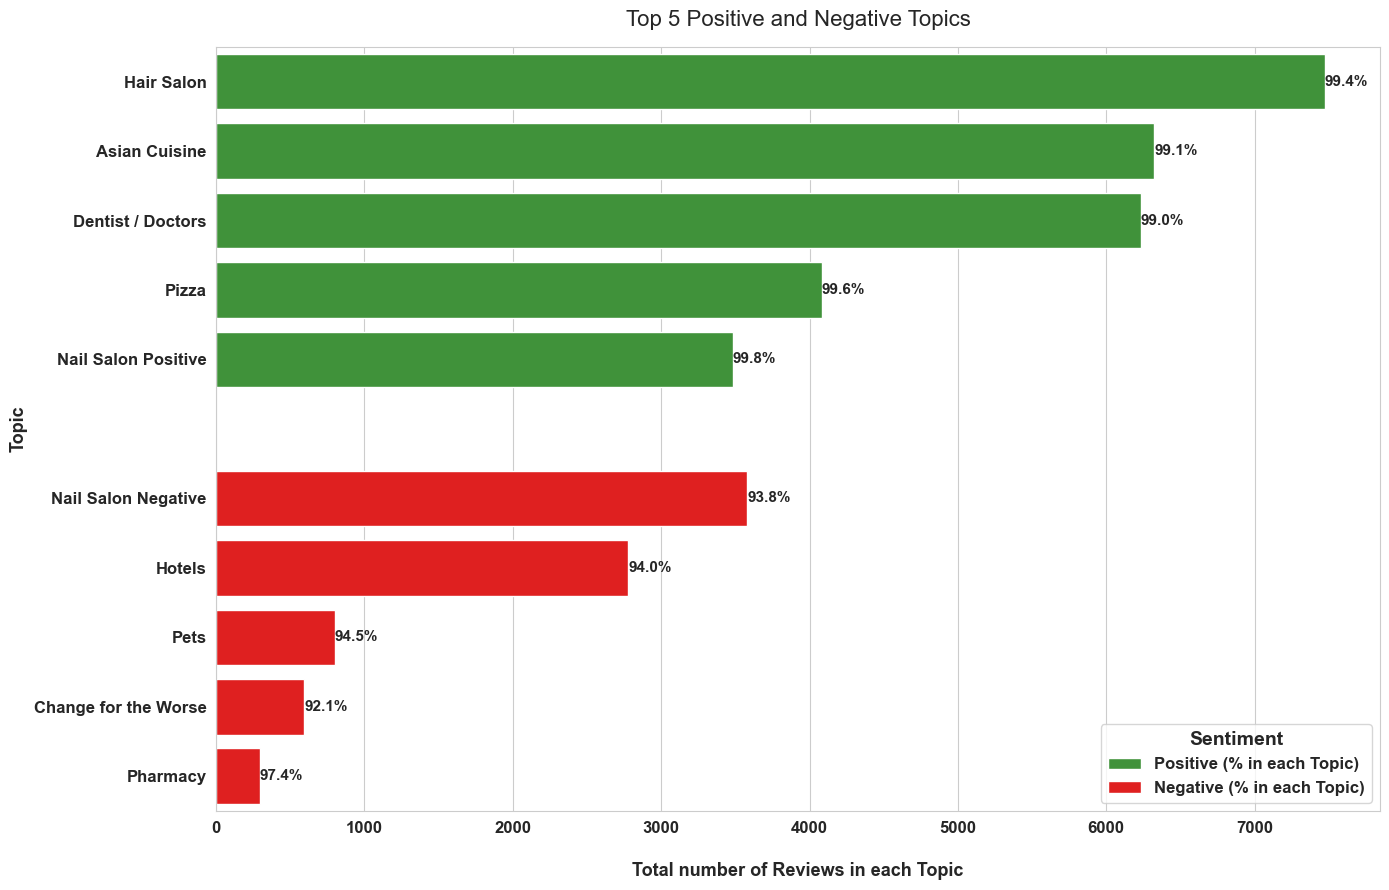

In [33]:
# make a bar plot of the top 5 topics per sentiment


# Separate positive and negative topics

top5_positive = top5_per_sentiment[top5_per_sentiment["sentiment_label"] == "positive"]

top5_negative = top5_per_sentiment[top5_per_sentiment["sentiment_label"] == "negative"]


# Combine
df = pd.concat([top5_positive, top5_negative], ignore_index=True)

# Add a blank row to create space between groups
blank = pd.DataFrame({
    'topic': [''],   # blank topic to create spacing
    'count': [0],
    'percentage': [0],
    'sentiment_label': ['']
})

df = pd.concat([top5_positive, blank, top5_negative], ignore_index=True)

# Create a custom color palette including a transparent color for the blank row
palette = {'positive':  '#33A02C', 'negative': 'red', '': 'none'}

# Plot
fig, ax = plt.subplots(figsize=(14, 9))
sns.set_style("whitegrid")

barplot = sns.barplot(
    data=df,
    y='topic',
    x='count',
    hue='sentiment_label',
    dodge=False,
    palette=palette,
    ax=ax
)

# Remove legend for blank category
handles, labels = ax.get_legend_handles_labels()
filtered = [(h, l) for h, l in zip(handles, labels) if l != '']
if filtered:
    handles, labels = zip(*filtered)
    ax.legend(handles, labels, title='Sentiment')

# Add percentage labels (skip blank)
for bar, (_, row) in zip(ax.patches, df.iterrows()):
    if row['topic'] == '':
        continue
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        width + 0.5,
        y,
        f"{row['percentage']:.1f}%",
        va='center',
        ha='left',
        fontsize=11,
        fontweight='bold'
    )

# Styling

# Get current legend
legend = ax.get_legend()
if legend:
    # Get current text labels
    for text in legend.texts:
        if text.get_text() == 'positive':
            text.set_text('Positive (% in each Topic)')
        elif text.get_text() == 'negative':
            text.set_text('Negative (% in each Topic)')
        
        # Set font properties
        text.set_fontsize(12)         # Change font size


ax.tick_params(axis='both', labelsize=12)

ax.set_title("Top 5 Positive and Negative Topics", fontsize=16, pad=15)
ax.set_xlabel("\nTotal number of Reviews in each Topic", fontsize=13)
ax.set_ylabel("Topic", fontsize=13)
# Customize font sizes


fig.tight_layout()
plt.show()


